The primary focus of this project is to perform an exploratory data analysis (EDA) on a dataset related to Video games sales. Through this EDA, the aim is to gain valuable insights and uncover patterns, trends, and relationships that may exist within the data.

As a gamer myself, I am interested in learning the trends of video games; how gaming trends changes from childhood to current time.


## Data Overview


First thing first, we need to import the modules we are going to use

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("video_games_sales.csv")

In [3]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## First Look at the Data

In this part of the project the detailed information about the dataset is provided. Column names and column data types are displayed. I will also count the number of null and unique values to identify if there is any missing data that could possibly affect the conclusions.

In [4]:
# Getting the shape of the DataFrame
df.shape

(16598, 11)

In [5]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Generating the summary statistics
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# Check data types
df.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

In [9]:
# Check for unique values
df.nunique()

rank            16598
name            11493
platform           31
year               39
genre              12
publisher         578
na_sales          409
eu_sales          305
jp_sales          244
other_sales       157
global_sales      623
dtype: int64

In [8]:
# Check for null values
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

## Data Cleaning

We found as many as 271 null values in year column and 58 values in publisher column.
This means we need to clean the data.

In [10]:
# drop missing values
df.dropna(inplace=True)
df.isna().sum()

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

## Analysis and Data Visualisation

Here the fun begins. We will see the analysis and visualized of numbers of sales by year, what year the market peaked, highest-selling genre, highest selling console, highest-selling game titles, top publishers of games and sales of game by diffrent region.

#### Sales of Games by Year 

In [12]:
# Group by year and sum global sales
Sales_Of_Games_By_Year = df.groupby('year')['global_sales'].sum()
Sales_Of_Games_By_Year

year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    414.01
2005.0    458.51
2006.0    521.04
2007.0    609.92
2008.0    678.90
2009.0    667.30
2010.0    600.29
2011.0    515.80
2012.0    363.49
2013.0    368.11
2014.0    337.03
2015.0    264.44
2016.0     70.90
2017.0      0.05
2020.0      0.29
Name: global_sales, dtype: float64

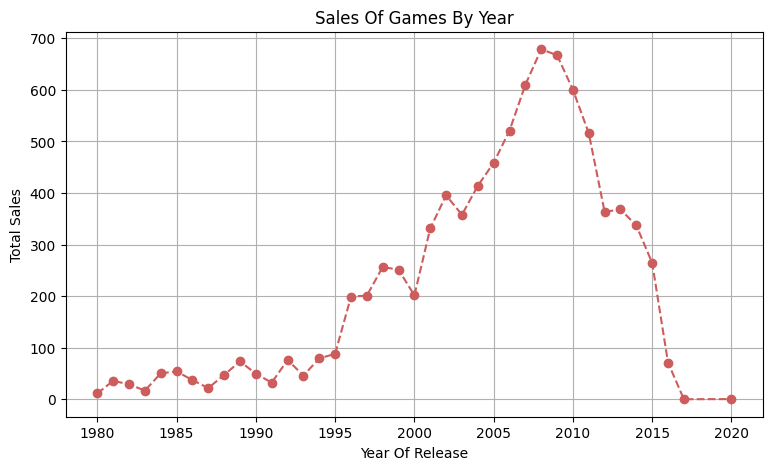

In [13]:
# Visulisation of Sales of Games By Year
Sales_Of_Games_By_Year.plot.line(marker='o', color='indianred', linestyle='--', figsize=(9, 5))
plt.xlabel('Year Of Release')
plt.ylabel('Total Sales')
plt.title('Sales Of Games By Year')
plt.grid()

In [14]:
# Looking into when the market peaked
Sales_Of_Games_By_Year.sort_values(ascending=False).head()

year
2008.0    678.90
2009.0    667.30
2007.0    609.92
2010.0    600.29
2006.0    521.04
Name: global_sales, dtype: float64

#### Market seems to peak at 2008 with 678.90M Sales Globally

In [15]:
# Filter data for the year 2008
Year_2008 = df[df['year'] == 2008]
Year_2008

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
39,40,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
51,52,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
56,57,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
88,89,Pokémon Platinum Version,DS,2008.0,Role-Playing,Nintendo,2.82,1.78,2.69,0.55,7.84
...,...,...,...,...,...,...,...,...,...,...,...
16575,16578,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01


## Which Platform and Genre Made the Most Sales When the Market Peaked ?

In [16]:
# Group by platform and sum global sales
Most_Popular_Platform = Year_2008.groupby('platform')['global_sales'].sum().sort_values(ascending = False)
Most_Popular_Platform

platform
Wii     174.16
DS      147.89
X360    135.76
PS3     119.69
PS2      53.83
PSP      34.68
PC       12.67
XB        0.18
DC        0.04
Name: global_sales, dtype: float64

Text(0.5, 1.0, 'Most Popular Platforms In 2008')

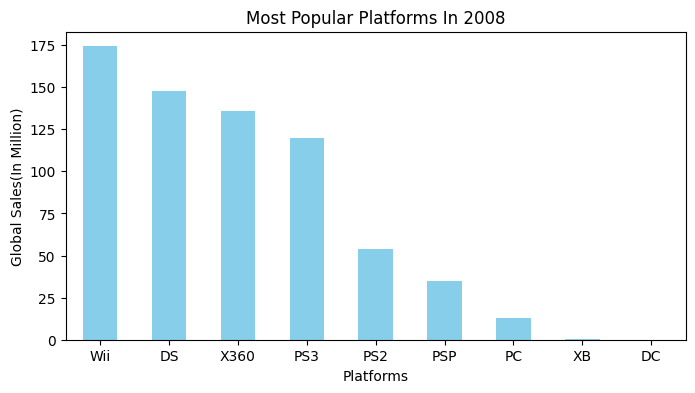

In [17]:
# Plot the most popular platforms in 2008
Most_Popular_Platform.plot.bar(color='skyblue', figsize=(8, 4))
plt.xticks(rotation=0)
plt.xlabel('Platforms')
plt.ylabel('Global Sales(In Million)')
plt.title('Most Popular Platforms In 2008')

#### Most sold console in 2008: **Wii** with **174.16** million units sold.

In [18]:
# Group by genre and sum global sales
Most_Popular_Genres = Year_2008.groupby('genre')['global_sales'].sum().sort_values(ascending = False)
Most_Popular_Genres

genre
Action          136.39
Sports           95.34
Misc             87.03
Racing           70.66
Role-Playing     59.83
Shooter          59.51
Simulation       46.76
Platform         35.70
Fighting         35.38
Adventure        25.02
Puzzle           15.59
Strategy         11.69
Name: global_sales, dtype: float64

Text(0.5, 1.0, 'Most Popular Genres In 2008')

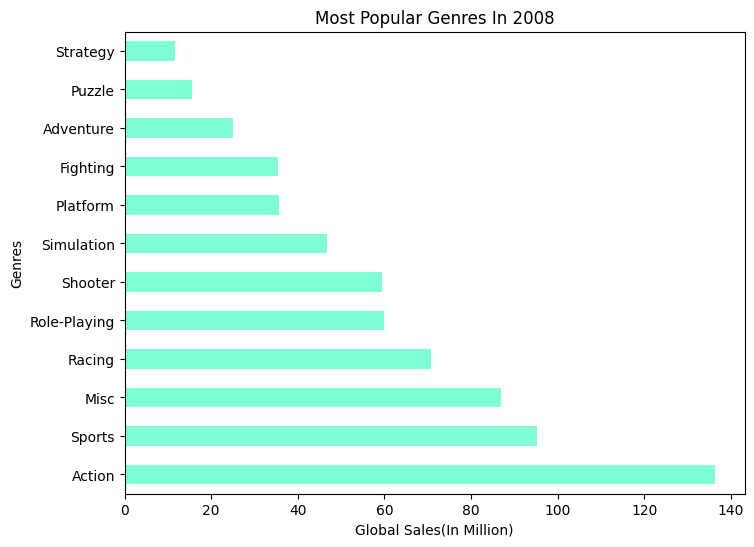

In [19]:
# Plot the most popular genres in 2008
Most_Popular_Genres.plot.barh(color='aquamarine', figsize=(8, 6))
plt.ylabel('Genres')
plt.xlabel('Global Sales(In Million)')
plt.title('Most Popular Genres In 2008')

#### Most popular genre in 2008: **Action** with **136.39** million units sold.

## The Best-Selling Games of 2008

In [20]:
# Display the top 10 most sold games in 2008
Top_10_Most_Sold_Games = Year_2008.groupby('name')['global_sales'].sum().nlargest(10)
Top_10_Most_Sold_Games

name
Mario Kart Wii                                 35.82
Grand Theft Auto IV                            22.47
Call of Duty: World at War                     15.87
Super Smash Bros. Brawl                        13.04
Star Wars: The Force Unleashed                 10.23
Guitar Hero: World Tour                        10.05
Fallout 3                                       9.96
LEGO Indiana Jones: The Original Adventures     9.66
LEGO Batman: The Videogame                      9.18
FIFA Soccer 09                                  8.67
Name: global_sales, dtype: float64

Text(0.5, 1.0, 'Top 10 Most Sold Games In 2008')

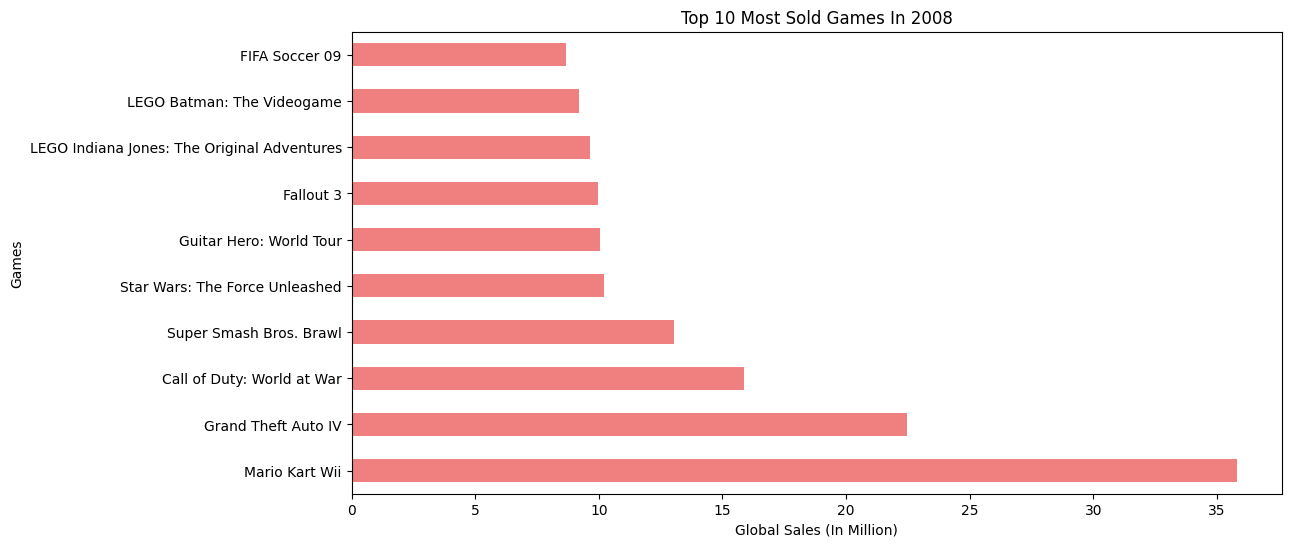

In [21]:
# Plot the top 10 most sold games in 2008
Top_10_Most_Sold_Games.plot.barh(color='lightcoral', figsize=(12, 6))
plt.ylabel('Games')
plt.xlabel('Global Sales (In Million)')
plt.title('Top 10 Most Sold Games In 2008') 

### Publisher with Most Released Games


In [22]:
# The top publishers with the most released game titles in 2008
Top_Publisher = Year_2008['publisher'].value_counts().head()
Top_Publisher

publisher
Electronic Arts                 120
Ubisoft                         112
Activision                       88
Sega                             67
Konami Digital Entertainment     64
Name: count, dtype: int64

Text(0.5, 1.0, 'Top Publisher In 2008')

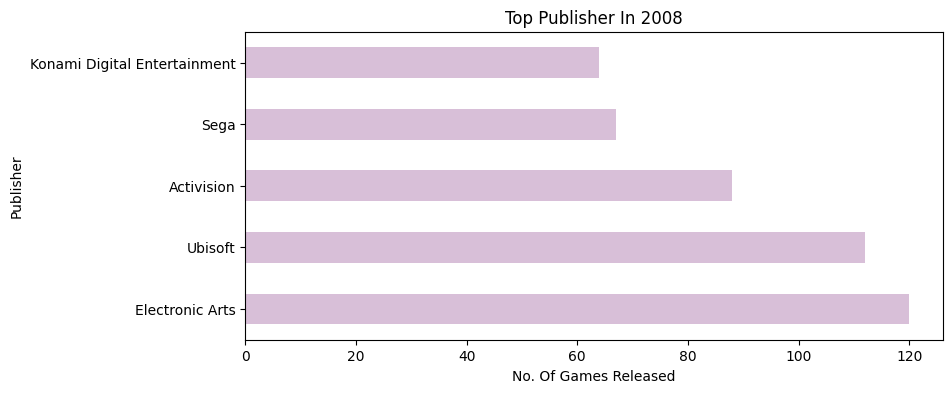

In [26]:
# Plot the publishers with the most released game titles in 2008
Top_Publisher.nlargest(5).plot.barh(color='thistle', figsize=(9, 4))
plt.xlabel('No. Of Games Released')
plt.ylabel('Publisher')
plt.title('Top Publisher In 2008')

#### Publisher with Most Released Games in 2008: **Electronic Arts** with **120** Games Released.

## Genre Sales By Market

In [24]:
# Group by genre and sum sales for each region
Genre_Sales_By_Region = Year_2008.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
Genre_Sales_By_Region

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,72.39,39.49,6.00,18.55
Adventure,13.01,5.62,4.34,1.94
Fighting,18.23,7.17,6.15,3.86
Misc,47.63,21.04,7.24,11.00
Platform,17.57,10.78,2.36,4.94
Puzzle,8.18,5.13,0.92,1.30
Racing,33.50,24.32,4.21,8.70
Role-Playing,25.25,11.30,17.51,5.63
Shooter,34.95,16.29,0.77,7.50


Text(0.5, 1.0, 'Genre Sales By Region In 2008')

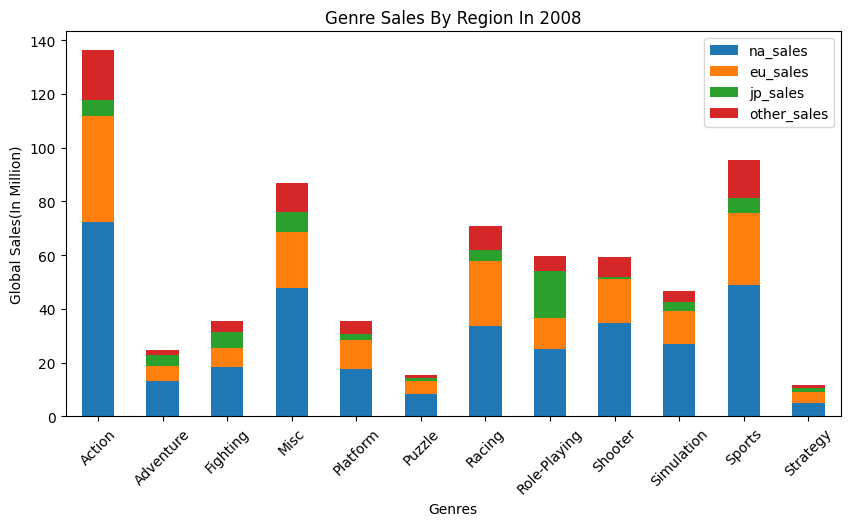

In [25]:
# Plotting genre sales by region
Genre_Sales_By_Region.plot.bar(stacked=True, figsize=(10, 5))
plt.xticks(rotation=45)
plt.ylabel('Global Sales(In Million)')
plt.xlabel('Genres')
plt.title('Genre Sales By Region In 2008')

## Conclusion

That is the result of the exploratory analysis of video games sales dataset. We now know in what year the market peaked, which is year 2008. We also see which Platform and Genre made the most sales when the market peaked, the top 10 highest-selling game titles, and what were the top game publishers. 

Indeed, this analysis has a lot of rooms for improvement, these datasets need cross-checking, and there are more insights to be discovered. I look forward to expanding on this analysis in the future.

